Following is the Assignment 3 task completed by 
1. Suraj Sharma (150914923)
2. Albin lamichhane (151229947)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandarallel
# Importing the required library for the task
import pandas as pd
import numpy as np
import scipy.stats
import itertools


from pandarallel import pandarallel

#mounting the the google drive

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# naming of required column for all data
columns_name = {'data' : ["user_id", "item_id", "rating", "timestamp"] ,
                'item' : ['movie_id', 'movie_title' , 'release_date' , 'video_release_date' ,
              'IMDb_URL' , 'unknown' , 'Action', 'Adventure' , 'Animation' ,
              'Children', 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film_Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western' ],
              'user': ['user_id' , 'age' , 'gender' , 'occupation' , 'zip code'],
              'genre' : ['genre_name', 'genre_ID'] 
              }

In [ ]:
#reading data from the file of google drive
data = pd.read_csv('/content/drive/MyDrive/recommenderassignment1/u.data', "\t", encoding="utf-8", names= columns_name['data'])
print(data.head(5))
print("---------------------------------------------")
print("Number of row of the given data is: ", len(data.user_id))
print("---------------------------------------------")
print(data.info())
print("---------------------------------------------")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
---------------------------------------------
Number of row of the given data is:  100000
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
---------------------------------------------


In [ ]:
# reading movies file from the drive
movies = pd.read_csv("/content/drive/MyDrive/recommenderassignment1/u.item", sep = '|' ,encoding="latin-1", names= columns_name['item'])
print('----------------------------------------------------')
print(movies.head(2))
print("----------------------------------------------------")
print("Total number of given movies is : ",len(movies))
print("----------------------------------------------------")
movies.drop(['video_release_date', 'release_date', 'IMDb_URL'], axis=1, inplace = True)
print(movies.head(2))
print("----------------------------------------------------")
movies=movies[0:100]

----------------------------------------------------
   movie_id       movie_title release_date  video_release_date  \
0         1  Toy Story (1995)  01-Jan-1995                 NaN   
1         2  GoldenEye (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   

   Adventure  Animation  Children  ...  Fantasy  Film_Noir  Horror  Musical  \
0          0          1         1  ...        0          0       0        0   
1          1          0         0  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        0       0         1    0        0  

[2 rows x 24 columns]
----------------------------------------------------
Total number of given movies is :  1682
------------

In [ ]:
#reading user file from the drive
user = pd.read_csv('/content/drive/MyDrive/recommenderassignment1/u.user', sep = "|", encoding="utf-8", names= columns_name['user'])
print(user.head(2))
print("----------------------------------------------------")
print(len(user.user_id))
print("----------------------------------------------------")
genre = pd.read_csv('/content/drive/MyDrive/recommenderassignment1/u.genre', "|", encoding="utf-8", names= columns_name['genre'])
print(genre.head(2))

   user_id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
----------------------------------------------------
943
----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


  genre_name  genre_ID
0    unknown         0
1     Action         1


In [ ]:
def correlation_pearson(usera,userb):
  #step 1get all ratings by 2 users
  usera_ratings = data[data['user_id'] == usera].sort_values(by=['item_id'])
  userb_ratings = data[data['user_id'] == userb].sort_values(by=['item_id'])
  #step 2 get movie id watched by both users dubai le hereko movie ko dataframe
  userab = usera_ratings[usera_ratings["item_id"].isin(userb_ratings["item_id"])].sort_values(by=['item_id'])
  userba = userb_ratings[userb_ratings["item_id"].isin(usera_ratings["item_id"])].sort_values(by=['item_id'])
  #mean
  usera_mean = np.mean(usera_ratings['rating'])
  userb_mean = np.mean(userb_ratings['rating'])
  #Subtract
  var_a = np.array(np.subtract(userab['rating'],[usera_mean]))
  var_b = np.array(np.subtract(userba['rating'],[userb_mean]))
  #correlation formula
  first =np.sum(var_a*var_b)
  second =np.sqrt(np.sum(np.power(var_a,2)))*np.sqrt(np.sum(np.power(var_b,2)))
  correlation = first/second
  return correlation,usera,userb

In [ ]:
#top_ten users
def top_users(userid,num_of_users):
  test_users = user[user["user_id"] != userid]
  correlations_of_users = test_users.apply(lambda user:correlation_pearson(userid,user['user_id']), axis=1, result_type='expand')
  correlations_of_users.columns=['correlation','usera','userb']
  correlations_of_users = correlations_of_users.sort_values(by=['correlation'], ascending=False)
  similar_user = correlations_of_users.head(num_of_users)
  return similar_user

In [ ]:
#Calculate the item score for a user based on another user
def item_score_userab(usera,userb,item_id):
  #get user rating for an item
  usera_ratings = data[data['user_id'] == usera].sort_values(by=['item_id'])
  userb_ratings = data[data['user_id'] == userb].sort_values(by=['item_id'])
  #step 2 get movie id watched by both users dubai le hereko movie ko dataframe
  userba = userb_ratings[userb_ratings["item_id"].isin(usera_ratings["item_id"])].sort_values(by=['item_id'])
  #mean of user b
  userb_mean = np.mean(usera_ratings['rating'])
  #pearson correlation 
  correlation, usera ,userb =correlation_pearson(usera,userb)
  var_b = float(userb_ratings[userb_ratings["item_id"] == item_id]["rating"]) - userb_mean
  #output
  first = correlation *var_b
  second = correlation
  return [first,second]

In [ ]:
def user_movie_predict(user_id,item_id):
  #user ratings
   user_ratings = data[data['user_id'] == user_id].sort_values(by=['item_id'])
   #get mean user ratings
   user_ratings_mean= np.mean(user_ratings['rating'])
   #get other user who have rated the movie
   other_users = data[data['item_id'] ==item_id]
   #calculate item score
   score = other_users.apply(lambda user:item_score_userab(user_id,user['user_id'],item_id),axis=1, result_type='expand' )
   score= np.array(score)
   score = score[~np.isnan(score).any(axis=1), :]
   prediction_score = user_ratings_mean + np.sum(score[:,0]) / np.sum(score[:,1])

   return item_id, movies.at[item_id - 1, 'movie_title'], prediction_score

In [ ]:
def get_user_prediction(user_id):
  pandarallel.initialize(nb_workers=64,progress_bar=True)


  movies_score=movies.parallel_apply(lambda movie:user_movie_predict(user_id,movie['movie_id']),axis=1,result_type="expand")

  movies_score.columns = ['movie_id',"movie_title","prediction_rating"]


  return movies_score

In [ ]:
  usera_ratings = get_user_prediction(2)
  userb_ratings = get_user_prediction(5)
  userc_ratings = get_user_prediction(6)

  print(usera_ratings.head(10))
  
  print(userb_ratings.head(10))
  
  print(userc_ratings.head(10))

INFO: Pandarallel will run on 64 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


INFO: Pandarallel will run on 64 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


INFO: Pandarallel will run on 64 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


   movie_id                                        movie_title  \
0         1                                   Toy Story (1995)   
1         2                                   GoldenEye (1995)   
2         3                                  Four Rooms (1995)   
3         4                                  Get Shorty (1995)   
4         5                                     Copycat (1995)   
5         6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
6         7                              Twelve Monkeys (1995)   
7         8                                        Babe (1995)   
8         9                            Dead Man Walking (1995)   
9        10                                 Richard III (1995)   

   prediction_rating  
0           3.900488  
1           3.090040  
2           2.941847  
3           3.560748  
4           3.216972  
5           3.881714  
6           3.824165  
7           3.947538  
8           4.018546  
9           3.207726  
   movie_id         

**Average Aggregation method**

In [ ]:
def agg_method(usera,userb,userc):

  group_data = [usera_ratings["movie_title"],usera_ratings["prediction_rating"],userb_ratings["prediction_rating"],userc_ratings["prediction_rating"]]
  headers = ["movie title", "usera rating", "userb rating", "userc rating"]
  users_ratings_combine_agg = pd.concat(group_data,axis=1,keys=headers)
  users_ratings_combine_agg['average_aggregration'] =  users_ratings_combine_agg.iloc[:,1:4].mean(axis=1)

  return users_ratings_combine_agg

In [ ]:
def get_average_top_movies(usera,userb,userc,num_of_movies):

  users_ratings_combine = agg_method(usera,userb,userc)
  print(users_ratings_combine)
  popular_movies = users_ratings_combine.sort_values(by=["average_aggregration"],ascending=False)
  
  
  return popular_movies

In [ ]:
movie_avg_met = agg_method(2,4,6)
movie_avg_met.head(20)

movie title  usera rating  \
0                                    Toy Story (1995)      3.900488   
1                                    GoldenEye (1995)      3.090040   
2                                   Four Rooms (1995)      2.941847   
3                                   Get Shorty (1995)      3.560748   
4                                      Copycat (1995)      3.216972   
5   Shanghai Triad (Yao a yao yao dao waipo qiao) ...      3.881714   
6                               Twelve Monkeys (1995)      3.824165   
7                                         Babe (1995)      3.947538   
8                             Dead Man Walking (1995)      4.018546   
9                                  Richard III (1995)      3.207726   
10                               Seven (Se7en) (1995)      3.796313   
11                         Usual Suspects, The (1995)      4.446519   
12                            Mighty Aphrodite (1995)      3.678272   
13                                 Postino, Il (1994)      4.052797   
14                          Mr. Holland's Opus (1995)      3.662098   
15                 French Twist (Gazon maudit) (1995)      3.517497   
16                         From Dusk Till Dawn (1996)      3.259841   
17                          White Balloon, The (1995)      2.371082   
18                              Antonia's Line (1995)      3.783061   
19                          Angels and Insects (1995)      3.672453   

    userb rating  userc rating  average_aggregration  
0       3.981130      3.850876              3.910832  
1       3.183859      3.039453              3.104451  
2       2.902119      3.071217              2.971728  
3       3.625485      3.665220              3.617151  
4       3.194578      3.293438              3.234996  
5       3.804613      3.832767              3.839698  
6       3.842728      3.674140              3.780344  
7       3.936636      4.011985              3.965386  
8       3.779411      4.115668              3.971209  
9       3.366487      4.000655              3.524956  
10      3.862344      3.746462              3.801707  
11      4.511684      4.417010              4.458404  
12      3.224128      3.446212              3.449537  
13      3.712693      4.249369              4.004953  
14      3.771012      3.250497              3.561202  
15      3.527780      3.421098              3.488792  
16      3.322991      3.149959              3.244264  
17      2.610648      4.038080              3.006603  
18      3.887833      3.989572              3.886822  
19      3.454605      3.679938              3.602332

**Task 2: Least-misery aggregation method**

df.plot(kind="box")

**Taking the prediction value of each user according to the quantile range from 0.05 to 0.95 and taking the combined dataframe according to the movie id for selected user**

(98, 6)


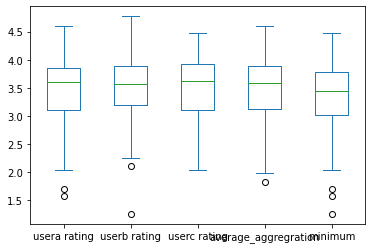

In [ ]:
df1 = df[(df["userc rating"]>=1) & (df["userc rating"] <=5) & (df["usera rating"] >=1) & (df["usera rating"]<=5) & (df["userb rating"] >=1) & (df["userb rating"]<=5)]
print(df1.shape)
df1.plot(kind='box')

**Spliting the df into 5 df**

In [ ]:
chunkdf = np.array_split(df1,5)

In [ ]:
chunkdf[0]

movie title  usera rating  \
0                                    Toy Story (1995)      3.900488   
1                                    GoldenEye (1995)      3.090040   
2                                   Four Rooms (1995)      2.941847   
3                                   Get Shorty (1995)      3.560748   
4                                      Copycat (1995)      3.216972   
5   Shanghai Triad (Yao a yao yao dao waipo qiao) ...      3.881714   
6                               Twelve Monkeys (1995)      3.824165   
7                                         Babe (1995)      3.947538   
8                             Dead Man Walking (1995)      4.018546   
9                                  Richard III (1995)      3.207726   
10                               Seven (Se7en) (1995)      3.796313   
11                         Usual Suspects, The (1995)      4.446519   
12                            Mighty Aphrodite (1995)      3.678272   
13                                 Postino, Il (1994)      4.052797   
14                          Mr. Holland's Opus (1995)      3.662098   
15                 French Twist (Gazon maudit) (1995)      3.517497   
16                         From Dusk Till Dawn (1996)      3.259841   
17                          White Balloon, The (1995)      2.371082   
18                              Antonia's Line (1995)      3.783061   
19                          Angels and Insects (1995)      3.672453   

    userb rating  userc rating  average_aggregration   minimum  
0       3.981130      3.850876              3.910832  3.850876  
1       3.183859      3.039453              3.104451  3.039453  
2       2.902119      3.071217              2.971728  2.902119  
3       3.625485      3.665220              3.617151  3.560748  
4       3.194578      3.293438              3.234996  3.194578  
5       3.804613      3.832767              3.839698  3.804613  
6       3.842728      3.674140              3.780344  3.674140  
7       3.936636      4.011985              3.965386  3.936636  
8       3.779411      4.115668              3.971209  3.779411  
9       3.366487      4.000655              3.524956  3.207726  
10      3.862344      3.746462              3.801707  3.746462  
11      4.511684      4.417010              4.458404  4.417010  
12      3.224128      3.446212              3.449537  3.224128  
13      3.712693      4.249369              4.004953  3.712693  
14      3.771012      3.250497              3.561202  3.250497  
15      3.527780      3.421098              3.488792  3.421098  
16      3.322991      3.149959              3.244264  3.149959  
17      2.610648      4.038080              3.006603  2.371082  
18      3.887833      3.989572              3.886822  3.783061  
19      3.454605      3.679938              3.602332  3.454605

**Calculating satisfaction of each user for every chunks data**
- let us assume for our process the group list is the result produce from avg aggregation method.

In [ ]:
iterationsat_usera = []
iterationsat_userb = []
iterationsat_userc = []
iter_sat_abc = []
for i in range(5):
  userlistsata = chunkdf[i]["usera rating"].sum()
  userlistsatb = chunkdf[i]["userb rating"].sum()
  userlistsatc = chunkdf[i]["userc rating"].sum()
  grplistsat = chunkdf[i]["average_aggregration"].sum()
  sata = grplistsat/userlistsata
  satb = grplistsat/userlistsatb
  satc = grplistsat/userlistsatc
  iterationsat_usera.append(sata)
  iterationsat_userb.append(satb)
  iterationsat_userc.append(satc)
  iter_sat_abc.append([sata, satb, satc])


In [ ]:
print(iterationsat_usera)
print(iterationsat_userb)
print(iterationsat_userc)

[1.0082925045126263, 1.0004586996335172, 1.0107323151038192, 0.991859280176713, 0.9996722657977064]
[1.0129030169599864, 0.9885554629851365, 0.995086365498497, 0.9919355551326189, 0.9926057134625157]
[0.9794674681535601, 1.0112435533614912, 0.9943516273032501, 1.016608892452717, 1.0078381700579393]


In [ ]:
print(iter_sat_abc)

[[1.0082925045126263, 1.0129030169599864, 0.9794674681535601], [1.0004586996335172, 0.9885554629851365, 1.0112435533614912], [1.0107323151038192, 0.995086365498497, 0.9943516273032501], [0.991859280176713, 0.9919355551326189, 1.016608892452717], [0.9996722657977064, 0.9926057134625157, 1.0078381700579393]]


**Calculating overall satisfaction of the user**

In [ ]:
sato_a = sum(iterationsat_usera)/len(iterationsat_usera)
sato_b = sum(iterationsat_userb)/len(iterationsat_userb)
sato_c = sum(iterationsat_userc)/len(iterationsat_userc)
print(sato_a, sato_b, sato_c)

1.0022030130448765 0.9962172228077509 1.0019019422657915


**Calculation of alpha value**

In [ ]:
alpha = [0] # Initiating the alpha with value 0 because for the first iteration the value of alpha is zero.
for i in range(4):
  maxsat = max(iter_sat_abc[i+1])
  minsat = min(iter_sat_abc[i+1])
  a = maxsat - minsat
  alpha.append(a)

In [ ]:
print(alpha)

[0, 0.022688090376354664, 0.016380687800569116, 0.02474961227600403, 0.015232456595423605]


**Use of alpha in sequential hybrid aggregation Method**

In [ ]:
for i in range(5):
  chunkdf[i]["sequential_score"] = (1-alpha[i])*chunkdf[i]["average_aggregration"] + alpha[i]*chunkdf[i]["minimum"]

**20 top movie recommendation according to Sequential Hybrid aggregation method**

In [ ]:
recommended_movies_chunk = []
for i in range(5):
  topmovie_recommendation = chunkdf[i].sort_values("sequential_score", ascending = False, ignore_index=True).head(20)
  display(topmovie_recommendation)
  recommended_movies_chunk.append(topmovie_recommendation)

movie title  usera rating  \
0                          Usual Suspects, The (1995)      4.446519   
1                                  Postino, Il (1994)      4.052797   
2                             Dead Man Walking (1995)      4.018546   
3                                         Babe (1995)      3.947538   
4                                    Toy Story (1995)      3.900488   
5                               Antonia's Line (1995)      3.783061   
6   Shanghai Triad (Yao a yao yao dao waipo qiao) ...      3.881714   
7                                Seven (Se7en) (1995)      3.796313   
8                               Twelve Monkeys (1995)      3.824165   
9                                   Get Shorty (1995)      3.560748   
10                          Angels and Insects (1995)      3.672453   
11                          Mr. Holland's Opus (1995)      3.662098   
12                                 Richard III (1995)      3.207726   
13                 French Twist (Gazon maudit) (1995)      3.517497   
14                            Mighty Aphrodite (1995)      3.678272   
15                         From Dusk Till Dawn (1996)      3.259841   
16                                     Copycat (1995)      3.216972   
17                                   GoldenEye (1995)      3.090040   
18                          White Balloon, The (1995)      2.371082   
19                                  Four Rooms (1995)      2.941847   

    userb rating  userc rating  average_aggregration   minimum  \
0       4.511684      4.417010              4.458404  4.417010   
1       3.712693      4.249369              4.004953  3.712693   
2       3.779411      4.115668              3.971209  3.779411   
3       3.936636      4.011985              3.965386  3.936636   
4       3.981130      3.850876              3.910832  3.850876   
5       3.887833      3.989572              3.886822  3.783061   
6       3.804613      3.832767              3.839698  3.804613   
7       3.862344      3.746462              3.801707  3.746462   
8       3.842728      3.674140              3.780344  3.674140   
9       3.625485      3.665220              3.617151  3.560748   
10      3.454605      3.679938              3.602332  3.454605   
11      3.771012      3.250497              3.561202  3.250497   
12      3.366487      4.000655              3.524956  3.207726   
13      3.527780      3.421098              3.488792  3.421098   
14      3.224128      3.446212              3.449537  3.224128   
15      3.322991      3.149959              3.244264  3.149959   
16      3.194578      3.293438              3.234996  3.194578   
17      3.183859      3.039453              3.104451  3.039453   
18      2.610648      4.038080              3.006603  2.371082   
19      2.902119      3.071217              2.971728  2.902119   

    sequential_score  
0           4.458404  
1           4.004953  
2           3.971209  
3           3.965386  
4           3.910832  
5           3.886822  
6           3.839698  
7           3.801707  
8           3.780344  
9           3.617151  
10          3.602332  
11          3.561202  
12          3.524956  
13          3.488792  
14          3.449537  
15          3.244264  
16          3.234996  
17          3.104451  
18          3.006603  
19          2.971728

movie title  usera rating  \
0                                  Taxi Driver (1976)      4.212438   
1                                   Braveheart (1995)      4.139410   
2                                Belle de jour (1967)      3.661514   
3                                    Apollo 13 (1995)      3.908753   
4                                        Crumb (1994)      3.663423   
5                                 Crimson Tide (1995)      3.592571   
6                          Rumble in the Bronx (1995)      3.476913   
7                       Brothers McMullen, The (1995)      3.431618   
8                                Birdcage, The (1996)      3.601376   
9                                    Desperado (1995)      3.455771   
10                                Strange Days (1995)      3.284205   
11                                    Bad Boys (1995)      2.934639   
12  To Wong Foo, Thanks for Everything! Julie Newm...      2.812790   
13                               Billy Madison (1995)      3.079852   
14                                    Net, The (1995)      2.851071   
15                      Muppet Treasure Island (1996)      2.662291   
16                              Batman Forever (1995)      2.587288   
17                                       Nadja (1994)      1.697494   
18                        Doom Generation, The (1995)      1.582889   
19                                    Mad Love (1995)      2.034143   

    userb rating  userc rating  average_aggregration   minimum  \
0       4.068320      4.293954              4.191571  4.068320   
1       4.138254      3.920890              4.066184  3.920890   
2       4.022674      3.934560              3.872916  3.661514   
3       3.921722      3.673212              3.834563  3.673212   
4       3.763167      3.882443              3.769677  3.663423   
5       3.770965      3.511831              3.625122  3.511831   
6       3.546775      3.530503              3.518063  3.476913   
7       3.471255      3.601276              3.501383  3.431618   
8       3.359164      3.352525              3.437688  3.352525   
9       3.460941      3.241466              3.386059  3.241466   
10      3.145015      3.374225              3.267815  3.145015   
11      3.126662      2.834322              2.965208  2.834322   
12      2.912135      2.579242              2.768056  2.579242   
13      2.895974      2.296727              2.757518  2.296727   
14      2.900925      2.463574              2.738523  2.463574   
15      2.745953      2.596213              2.668152  2.596213   
16      2.553014      2.034421              2.391574  2.034421   
17      2.250719      2.416088              2.121434  1.697494   
18      2.117295      2.270646              1.990277  1.582889   
19      1.254136      2.193952              1.827410  1.254136   

    sequential_score  
0           4.188774  
1           4.062888  
2           3.868120  
3           3.830902  
4           3.767267  
5           3.622552  
6           3.517130  
7           3.499800  
8           3.435756  
9           3.382779  
10          3.265029  
11          2.962238  
12          2.763772  
13          2.747063  
14          2.732285  
15          2.666520  
16          2.383471  
17          2.111815  
18          1.981034  
19          1.814404

movie title  usera rating  userb rating  \
0                     Star Wars (1977)      4.609644      4.774320   
1           Eat Drink Man Woman (1994)      4.164948      4.361659   
2                   Hoop Dreams (1994)      4.116555      4.192327   
3                  Pulp Fiction (1994)      4.093374      4.094399   
4            Three Colors: Blue (1993)      4.154768      4.032781   
5             Three Colors: Red (1994)      4.133487      4.032555   
6                        Priest (1994)      3.860639      3.995706   
7           Three Colors: White (1994)      3.827472      3.862842   
8                        Clerks (1994)      3.712465      4.080942   
9   Madness of King George, The (1994)      3.794636      3.876286   
10            Professional, The (1994)      3.703468      3.791969   
11                    Quiz Show (1994)      3.660584      3.762826   
12                      Ed Wood (1994)      3.765932      3.560018   
13                      Exotica (1994)      3.439090      3.598481   
14            Dolores Claiborne (1994)      3.412202      3.324654   
15          Legends of the Fall (1994)      3.308492      3.245741   
16                         I.Q. (1994)      3.250285      3.193474   
17                     Outbreak (1995)      3.093389      3.293667   
18         Natural Born Killers (1994)      2.996797      2.989442   
19                   Disclosure (1994)      2.738682      2.933773   

    userc rating  average_aggregration   minimum  sequential_score  
0       4.439138              4.607701  4.439138          4.604939  
1       4.144836              4.223814  4.144836          4.222521  
2       4.207950              4.172277  4.116555          4.171365  
3       4.245217              4.144330  4.093374          4.143495  
4       4.207510              4.131686  4.032781          4.130066  
5       4.212864              4.126302  4.032555          4.124766  
6       4.195198              4.017181  3.860639          4.014617  
7       3.984415              3.891576  3.827472          3.890526  
8       3.814290              3.869232  3.712465          3.866664  
9       3.826960              3.832627  3.794636          3.832005  
10      3.851736              3.782391  3.703468          3.781098  
11      3.697375              3.706928  3.660584          3.706169  
12      3.647813              3.657921  3.560018          3.656318  
13      3.697450              3.578340  3.439090          3.576059  
14      3.280968              3.339274  3.280968          3.338319  
15      3.268671              3.274301  3.245741          3.273834  
16      3.173970              3.205910  3.173970          3.205387  
17      2.902679              3.096578  2.902679          3.093402  
18      3.143973              3.043404  2.989442          3.042520  
19      3.110264              2.927573  2.738682          2.924479

movie title  usera rating  \
0                    Shawshank Redemption, The (1994)      4.452792   
1                                Fugitive, The (1993)      4.072672   
2                                 Forrest Gump (1994)      3.846700   
3                  Four Weddings and a Funeral (1994)      3.622047   
4                         Hudsucker Proxy, The (1994)      3.509908   
5                               Lion King, The (1994)      3.670968   
6                  What's Eating Gilbert Grape (1993)      3.570036   
7                                Carlito's Way (1993)      3.474751   
8                                    Crow, The (1994)      3.405466   
9                                     Maverick (1994)      3.309833   
10                     While You Were Sleeping (1995)      3.334631   
11                                   Firm, The (1993)      3.129322   
12                                    Stargate (1994)      3.100282   
13                Faster Pussycat! Kill! Kill! (1965)      3.518374   
14                                   Mask, The (1994)      2.990998   
15  Brother Minister: The Assassination of Malcolm...      2.750364   
16                  Ace Ventura: Pet Detective (1994)      2.939714   
17                           Santa Clause, The (1994)      2.888354   
18                        Hot Shots! Part Deux (1993)      2.665246   

    userb rating  userc rating  average_aggregration   minimum  \
0       4.463767      4.439387              4.451982  4.439387   
1       4.092084      3.940098              4.034951  3.940098   
2       3.614287      3.681814              3.714267  3.614287   
3       3.757161      3.632097              3.670435  3.622047   
4       3.595295      3.890220              3.665141  3.509908   
5       3.614329      3.482676              3.589324  3.482676   
6       3.283414      3.571681              3.475044  3.283414   
7       3.503522      3.296554              3.424942  3.296554   
8       3.460372      3.227389              3.364409  3.227389   
9       3.431648      3.105915              3.282465  3.105915   
10      3.249446      3.211043              3.265040  3.211043   
11      3.196674      3.057152              3.127716  3.057152   
12      3.290647      2.990389              3.127106  2.990389   
13      2.705154      3.095325              3.106284  2.705154   
14      3.189822      2.999095              3.059972  2.990998   
15      3.276504      3.081264              3.036044  2.750364   
16      2.957480      2.592363              2.829852  2.592363   
17      2.814393      2.630091              2.777612  2.630091   
18      2.751518      2.763664              2.726809  2.665246   

    sequential_score  
0           4.451670  
1           4.032604  
2           3.711793  
3           3.669237  
4           3.661299  
5           3.586685  
6           3.470301  
7           3.421765  
8           3.361018  
9           3.278096  
10          3.263704  
11          3.125970  
12          3.123723  
13          3.096357  
14          3.058265  
15          3.028974  
16          2.823974  
17          2.773961  
18          2.725286

movie title  usera rating  \
0                                     Fargo (1996)      4.596102   
1                 Silence of the Lambs, The (1991)      4.318462   
2                              Blade Runner (1982)      4.135199   
3                    Much Ado About Nothing (1993)      4.108987   
4                   Remains of the Day, The (1993)      4.079423   
5               Searching for Bobby Fischer (1993)      3.870970   
6                Terminator 2: Judgment Day (1991)      3.863171   
7                  Welcome to the Dollhouse (1995)      3.946802   
8           Snow White and the Seven Dwarfs (1937)      3.722985   
9                              True Romance (1993)      3.746381   
10          Nightmare Before Christmas, The (1993)      3.769416   
11                       Dances with Wolves (1990)      3.738805   
12                                  Aladdin (1992)      3.617078   
13                            Jurassic Park (1993)      3.690866   
14                     Sleepless in Seattle (1993)      3.339092   
15                                 Ref, The (1994)      3.011596   
16             So I Married an Axe Murderer (1993)      2.888422   
17                               Home Alone (1990)      2.840973   
18  Robert A. Heinlein's The Puppet Masters (1994)      2.599906   

    userb rating  userc rating  average_aggregration   minimum  \
0       4.506249      4.475524              4.525959  4.475524   
1       4.261592      4.473143              4.351066  4.261592   
2       4.312306      4.253419              4.233641  4.135199   
3       3.990320      3.994150              4.031152  3.990320   
4       4.046995      3.902745              4.009721  3.902745   
5       3.979468      3.895287              3.915241  3.870970   
6       4.072042      3.802151              3.912455  3.802151   
7       3.579941      3.985197              3.837313  3.579941   
8       3.603894      3.978910              3.768596  3.603894   
9       3.706073      3.757579              3.736677  3.706073   
10      3.618190      3.666278              3.684628  3.618190   
11      3.561878      3.738652              3.679778  3.561878   
12      3.784175      3.387548              3.596267  3.387548   
13      3.645226      3.437970              3.591354  3.437970   
14      3.407651      3.384326              3.377023  3.339092   
15      3.268098      3.096359              3.125351  3.011596   
16      3.103997      2.934789              2.975736  2.888422   
17      2.980157      2.634606              2.818579  2.634606   
18      2.953906      2.519770              2.691194  2.519770   

    sequential_score  
0           4.525190  
1           4.349703  
2           4.232142  
3           4.030530  
4           4.008091  
5           3.914567  
6           3.910774  
7           3.833393  
8           3.766088  
9           3.736211  
10          3.683616  
11          3.677982  
12          3.593088  
13          3.589017  
14          3.376446  
15          3.123618  
16          2.974406  
17          2.815776  
18          2.688582

**Plot graph**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

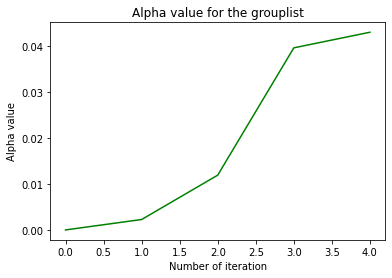

In [ ]:
ax = sns.lineplot(x = range(5), y=alpha, color="green")
ax.set(xlabel='Number of iteration', ylabel='Alpha value', title="Alpha value for the grouplist")
plt.show()

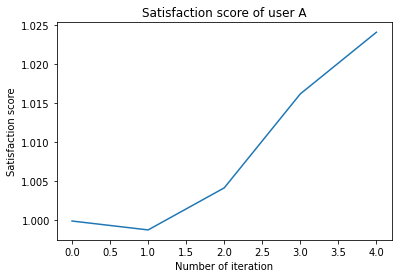

In [ ]:
ax = sns.lineplot(x=range(5), y = iterationsat_usera)
ax.set(xlabel='Number of iteration', ylabel='Satisfaction score', title="Satisfaction score of user A")
plt.show()

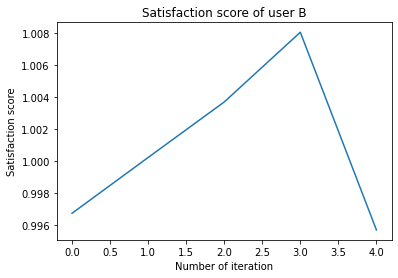

In [ ]:
ax = sns.lineplot(x=range(5), y = iterationsat_userb)
ax.set(xlabel='Number of iteration', ylabel='Satisfaction score', title="Satisfaction score of user B")
plt.show()

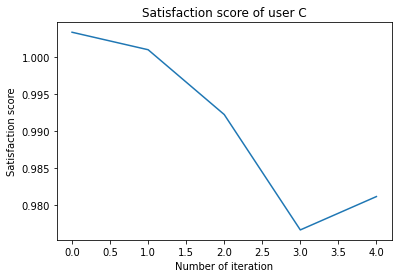

In [ ]:
ax = sns.lineplot(x=range(5), y = iterationsat_userc)
ax.set(xlabel='Number of iteration', ylabel='Satisfaction score', title="Satisfaction score of user C")
plt.show()

**Limitation And explanation**

Starting the value of alpha from zero for every other iteration we got the value of alpha relatively small. This could be because of our choice for the group of user is highly similar or the number of iteration is low. 

Because of small value of alpha it take the majority from the average aggregration model and minority from least misery aggregration model therefore representing as alike the distribution as average aggregration method but with slight lower value.

**Conclusion**

Our results shows that change (i.e. increasing and decreasing) in satisfaction level for each user.It also shows slight increase in alpha value in each iteration. From this we can say that the method used for the analysis is taking user preference over the movie choice by every iteration, and thus overcoming the limitation of average aggregation method and least misery aggregation method.